In [2]:
from syllable_counters import syllable_count_sentence_en, syllable_count_sentence_jp
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/raw', delimiter='\t', header=None)
df.columns = ['en', 'jp']

In [4]:
df['en_syllables'] = df.en.apply(lambda x: syllable_count_sentence_en(x))

In [ ]:
df['jp_syllables'] = df.jp.apply(lambda x: syllable_count_sentence_jp(x))

In [ ]:
df

In [ ]:
df['en_words'] = df.en.apply(lambda x: x.count(' ')+1)
df['jp_words'] = df.jp.apply(lambda x: len(x))
df['en_letters'] = df.en.apply(lambda x: len(x))
df['jp_letters'] = df.jp.apply(lambda x: len(x))

In [ ]:
en_syl_freq = df.groupby('en_syllables').en.count()
jp_syl_freq = df.groupby('jp_syllables').jp.count()

en_wrd_freq = df.groupby('en_words').en.count()
jp_wrd_freq = df.groupby('jp_words').jp.count()

en_let_freq = df.groupby('en_letters').en.count()
jp_let_freq = df.groupby('jp_letters').jp.count()

In [ ]:
df

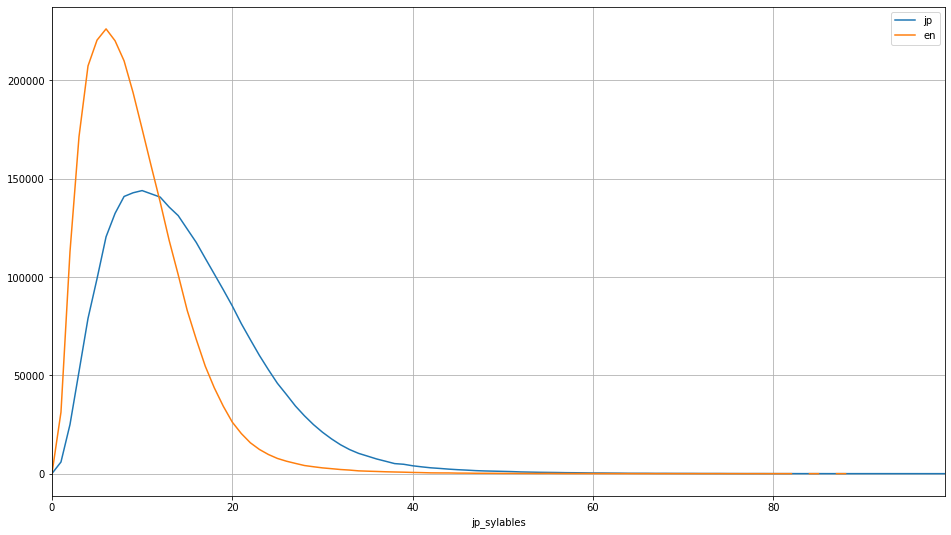

In [49]:
pd.DataFrame(jp_syl_freq[:100]).join(en_syl_freq[:100]).plot(figsize=(16, 9), grid=True)

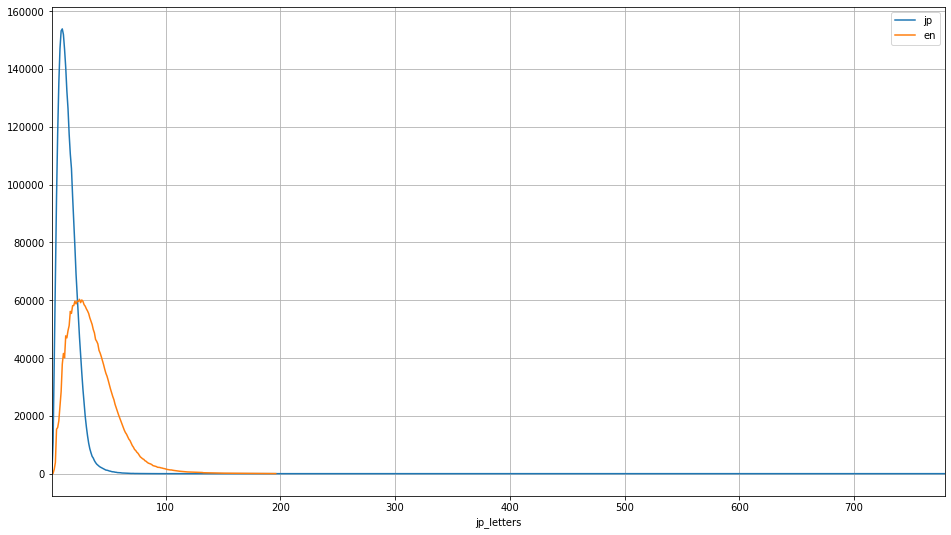

In [51]:
pd.DataFrame(jp_let_freq[:200]).join(en_let_freq[:200]).plot(figsize=(16, 9), grid=True)

In [89]:
(df.jp_syllables / df.en_syllables).replace([np.inf, -np.inf], np.nan).dropna().mean()

2.020046123166394

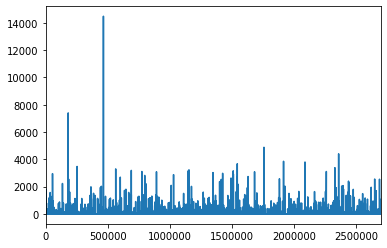

In [90]:
(df.jp_syllables / df.en_syllables).replace([np.inf, -np.inf], np.nan).dropna().plot()